In [1]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    opt = "adam"
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [3]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    #pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['sparse_categorical_accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    pyplot.close()

In [4]:
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('../data/CV/train/',
        class_mode='sparse', batch_size=20, target_size=(128, 32))
    test_it = datagen.flow_from_directory('../data/CV/test/',
        class_mode='sparse', batch_size=20, target_size=(128, 32))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

In [7]:
import time

W0810 16:53:59.164889 4510905792 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 16:53:59.182663 4510905792 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 16:53:59.185950 4510905792 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 16:53:59.199302 4510905792 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 16:53:59.229763 4510905792 deprecation_wrapper.py:119] From /anaconda

Found 2398 images belonging to 3 classes.
Found 283 images belonging to 3 classes.


W0810 16:53:59.578147 4510905792 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



> 46.997


KeyError: 'sparse_categorical_accuracy'

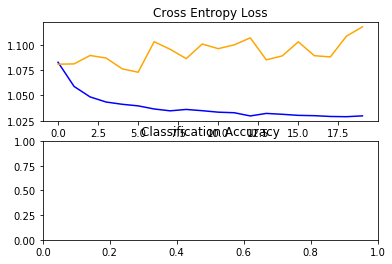

In [8]:
start = time.time()
run_test_harness()
end = time.time()
print((end-start)/60.0)

In [13]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import time

In [15]:
#try a pre-compiled model (mobilnet_v2)
from keras.applications.mobilenet_v2 import MobileNetV2


In [19]:
def compile_model(model):
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['sparse_categorical_accuracy']
    )

In [23]:
mobile = MobileNetV2(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
num_classes = 3

# Freeze the layers 
for layer in mobile.layers:
    layer.trainable = False
    
x = Flatten()(mobile.output)
x = Dense(num_classes, activation = 'softmax')(x)
mobile_model = Model(inputs = mobile.input, outputs = x)
    
compile_model(mobile_model)
print(mobile_model.summary())

14540800/14536120 [==============================] - 4s 0us/step


ValueError: Input 0 is incompatible with layer flatten_3: expected min_ndim=3, found ndim=2

In [24]:
print(mobile_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 32, 3)   0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 33, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

Found 2398 images belonging to 3 classes.
Found 283 images belonging to 3 classes.
Epoch 1/20
120/120 [==============================] - 6s 53ms/step - loss: 1.7094 - sparse_categorical_accuracy: 0.3769 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.3993
Epoch 2/20
120/120 [==============================] - 6s 53ms/step - loss: 1.7234 - sparse_categorical_accuracy: 0.3853 - val_loss: 1.1282 - val_sparse_categorical_accuracy: 0.3675
Epoch 3/20
120/120 [==============================] - 6s 52ms/step - loss: 1.6772 - sparse_categorical_accuracy: 0.4014 - val_loss: 1.2002 - val_sparse_categorical_accuracy: 0.3074
Epoch 4/20
120/120 [==============================] - 6s 51ms/step - loss: 1.8252 - sparse_categorical_accuracy: 0.3745 - val_loss: 1.1039 - val_sparse_categorical_accuracy: 0.3569
Epoch 5/20
120/120 [==============================] - 7s 58ms/step - loss: 1.7139 - sparse_categorical_accuracy: 0.3866 - val_loss: 1.2517 - val_sparse_categorical_accuracy: 0.2650
Epoch 6/20
1

KeyError: 'val_acc'

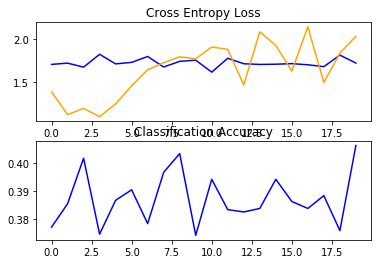

In [25]:
start = time.time()

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = datagen.flow_from_directory('../data/CV/train/',
    class_mode='sparse', batch_size=20, target_size=(128, 32))
test_it = datagen.flow_from_directory('../data/CV/test/',
    class_mode='sparse', batch_size=20, target_size=(128, 32))
# fit model
history = mobile_model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=20)
# evaluate model
_, acc = mobile_model.evaluate_generator(train_it, steps=len(train_it))
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

end = time.time()
print((end-start)/60.0)